In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'1110': 1024}


<ipython-input-2-6bf16e7b783a>:24: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(phase, qr[3], ur[0]) # cU^1


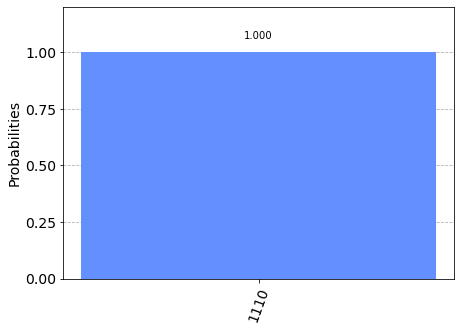

In [2]:
# https://arxiv.org/pdf/1903.07605.pdf
       
def iqft(qci, q, n):
    for i in range(n):
        for j in range(i):
            qci.cu1(-pi/float(2**(i-j)),q[j], q[i])
        qci.h(q[i])

n = 4
phase = 14.0*pi/8.0
qr = QuantumRegister(n, 'qr')
ur = QuantumRegister(1, 'ur')
c = ClassicalRegister(n)
qc = QuantumCircuit(qr, ur, c)

qc.h(qr)
qc.x(ur[0])

#qc.cu1(1*phase, qr[3], ur[0]) # cU^1
#qc.cu1(2*phase, qr[2], ur[0]) # cU^2
#qc.cu1(4*phase, qr[1], ur[0]) # cU^4
#qc.cu1(8*phase, qr[0], ur[0]) # cU^8

qc.cu1(phase, qr[3], ur[0]) # cU^1

qc.cu1(phase, qr[2], ur[0]) # cU^2
qc.cu1(phase, qr[2], ur[0]) # cU^2

qc.cu1(phase, qr[1], ur[0]) # cU^4
qc.cu1(phase, qr[1], ur[0]) # cU^4
qc.cu1(phase, qr[1], ur[0]) # cU^4
qc.cu1(phase, qr[1], ur[0]) # cU^4

qc.cu1(phase, qr[0], ur[0]) # cU^8
qc.cu1(phase, qr[0], ur[0]) # cU^8
qc.cu1(phase, qr[0], ur[0]) # cU^8
qc.cu1(phase, qr[0], ur[0]) # cU^8
qc.cu1(phase, qr[0], ur[0]) # cU^8
qc.cu1(phase, qr[0], ur[0]) # cU^8
qc.cu1(phase, qr[0], ur[0]) # cU^8
qc.cu1(phase, qr[0], ur[0]) # cU^8


iqft(qc, qr, n)

qc.measure(qr, c)

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [3]:
theta=2*pi*(1/2+1/4+1/8)
print(theta, phase)

5.497787143782138 5.497787143782138


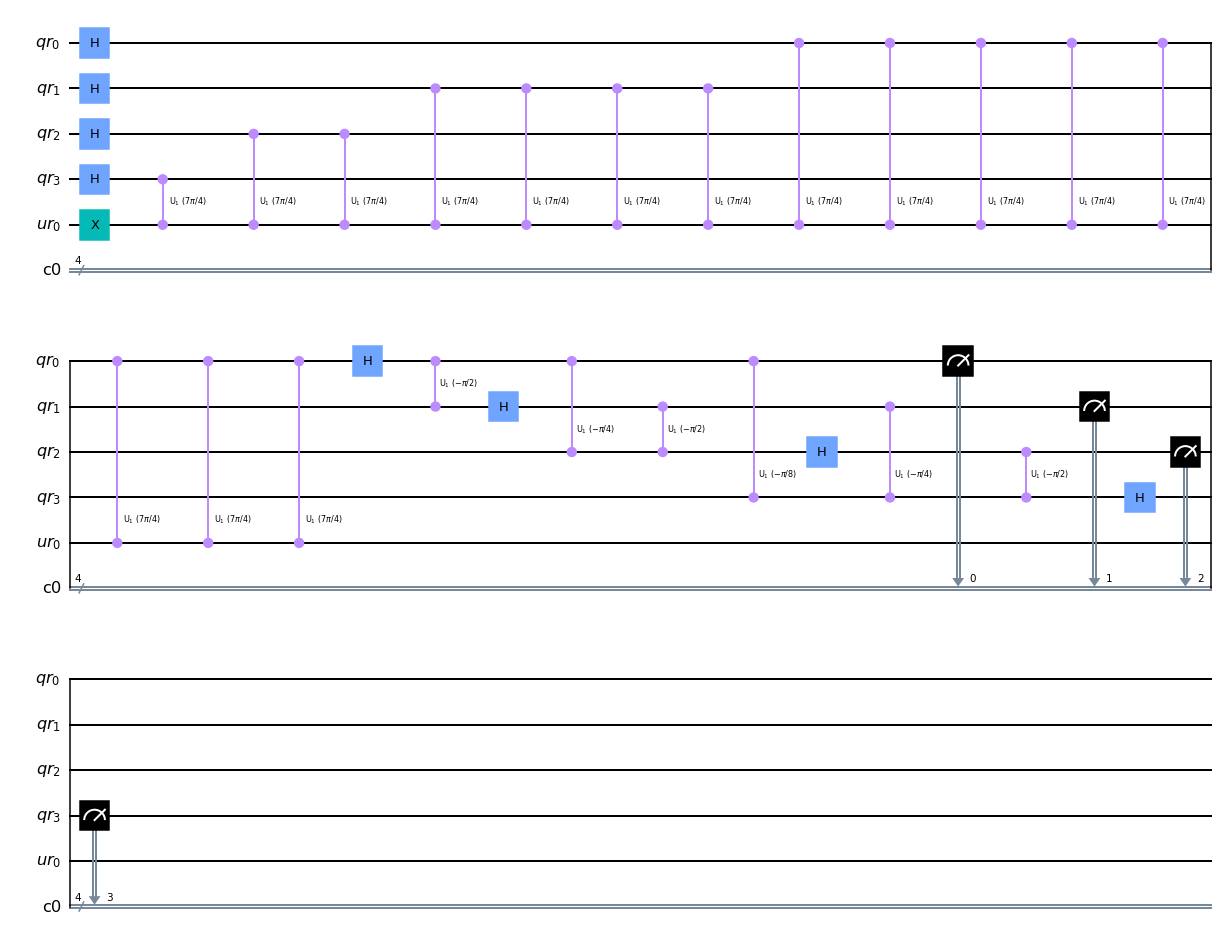

In [4]:
qc.draw(output='mpl')

In [5]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub

In [7]:
result_exp = job_exp.result()
print(result_exp)

Result(backend_name='ibmq_athens', backend_version='1.3.15', qobj_id='4ea6b69e-98f6-4f49-85b9-1ed354ea10da', job_id='6071e59a57095c2dde7d8051', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 118, '0x1': 18, '0x2': 95, '0x3': 17, '0x4': 102, '0x5': 21, '0x6': 87, '0x7': 16, '0x8': 133, '0x9': 33, '0xa': 98, '0xb': 20, '0xc': 115, '0xd': 15, '0xe': 112, '0xf': 24}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1], ['c0', 2], ['c0', 3]], creg_sizes=[['c0', 4]], global_phase=0.0981747704246776, memory_slots=4, metadata={}, n_qubits=5, name='circuit-9', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), memory=False)], date=2021-04-10 14:52:03-03:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_athens', backend_version='1.3.15'), time_taken=8.00616979598999, execution_id='7075c58e-9a25-11eb-8a26-b02628ea1e00', client_version={'qiskit': '0.25.0'

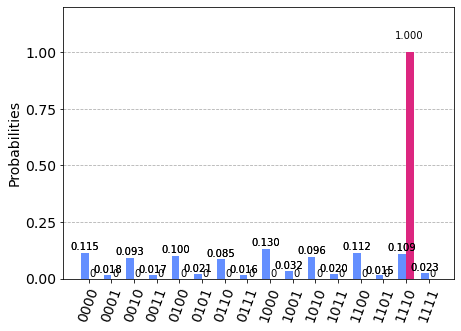

In [8]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [9]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

JOB ID: 6071e59a57095c2dde7d8051


In [10]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[4];
qreg ur[1];
creg c0[4];
h qr[0];
h qr[1];
h qr[2];
h qr[3];
x ur[0];
cu1(7*pi/4) qr[3],ur[0];
cu1(7*pi/4) qr[2],ur[0];
cu1(7*pi/4) qr[2],ur[0];
cu1(7*pi/4) qr[1],ur[0];
cu1(7*pi/4) qr[1],ur[0];
cu1(7*pi/4) qr[1],ur[0];
cu1(7*pi/4) qr[1],ur[0];
cu1(7*pi/4) qr[0],ur[0];
cu1(7*pi/4) qr[0],ur[0];
cu1(7*pi/4) qr[0],ur[0];
cu1(7*pi/4) qr[0],ur[0];
cu1(7*pi/4) qr[0],ur[0];
cu1(7*pi/4) qr[0],ur[0];
cu1(7*pi/4) qr[0],ur[0];
cu1(7*pi/4) qr[0],ur[0];
h qr[0];
cu1(-pi/2) qr[0],qr[1];
h qr[1];
cu1(-pi/4) qr[0],qr[2];
cu1(-pi/2) qr[1],qr[2];
h qr[2];
cu1(-pi/8) qr[0],qr[3];
cu1(-pi/4) qr[1],qr[3];
cu1(-pi/2) qr[2],qr[3];
h qr[3];
measure qr[0] -> c0[0];
measure qr[1] -> c0[1];
measure qr[2] -> c0[2];
measure qr[3] -> c0[3];

